<a href="https://colab.research.google.com/github/EduGod0y/FPI/blob/main/Trabalho_2_FPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INF01046 – Fundamentos de Processamento de Imagens
###Manuel M. Oliveira

###Primeiro Trabalho de Implementação
##**Transformações Lineares, Equalização e Matching de Histograma, Convolução e Filtragem no Domínio Espacial**

In [ ]:
!pip install Pillow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

from PIL import Image, ImageEnhance

import os, sys
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




# read an image
img = Image.open("Gramado_72k.jpg")

print(img.format, img.size, img.mode)



JPEG (320, 240) RGB


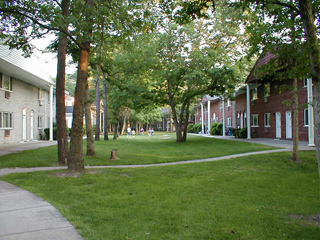

In [ ]:
display.display(img)

###Parte 1
1) (20 pontos) Calcular e exibir o histograma de uma imagem em tons de cinza (8 bits por
pixel). Caso a imagem informada como entrada seja colorida, converta-a para tons de cinza
(luminância) e então calcule seu histograma. Exiba o histograma em uma janela separada,
onde cada coluna da imagem representa um tom de cinza. Normalize a altura das colunas
para obter uma representação apropriada. 

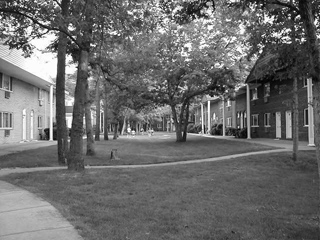

In [ ]:
img_L = img.convert("L")
img_L.save('imagem_L.jpeg')
display.display(img_L)

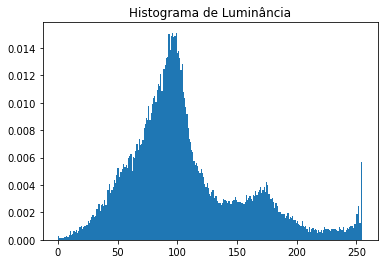

In [ ]:
import cv2
import matplotlib.pyplot as plt

imgpath = "imagem_L.jpeg"
img1 = cv2.imread(imgpath,0)


#plt.subplot(1,2,2)
plt.hist(img1.ravel(),256,[0,255], density = True)
plt.title('Histograma de Luminância')
#plt.ylim(0,10000)


plt.show()

2) 
(15 pontos) Ajustar o brilho de uma imagem (e exibí-la), somando ao valor de cada pixel
um escalar no intervalo [-255, 255]. Certifique-se que o resultado da operação aplicado a
cada pixel encontra-se na faixa [0,255], ajustando-o para zero ou 255 quando necessário. No
caso de imagens coloridas, aplique o algoritmo para cada um dos canais (R,G,B)
independentemente.

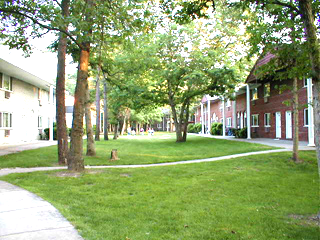

In [ ]:
enhancer = ImageEnhance.Brightness(img)

factor = 1.5 
im_output = enhancer.enhance(factor)
display.display(im_output)

3) (15 pontos) Ajustar o contraste de uma imagem (e exibí-la), multiplicando cada pixel por
um escalar no intervalo (0, 255]. Certifique-se que o resultado da operação aplicado a cada
pixel encontra-se na faixa [0,255], ajustando-o para 255 quando necessário. No caso de
imagens coloridas, aplique o algoritmo para cada um dos canais (R,G,B) independentemente. 

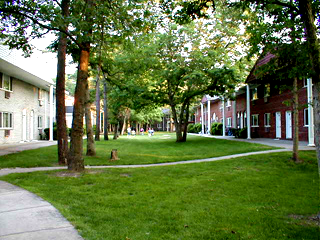

In [ ]:
enhancer = ImageEnhance.Contrast(img)
factor = 1.5 
im_output = enhancer.enhance(factor)
display.display(im_output)

4) (10 pontos) Calcular e exibir o negativo de uma imagem, calculando o novo valor de cada
pixel como: (novo valor) = 255 - (antigo valor). No caso de imagens coloridas, aplique o
algoritmo para cada um dos canais (R,G,B) independentemente. 

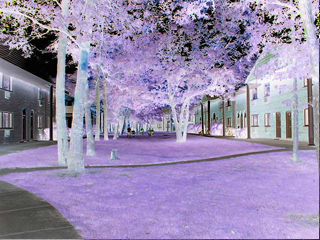

In [ ]:
for i in range(0, img.size[0]-1):

    for j in range(0, img.size[1]-1):

        #Pegando o valor de cada pixel em (x,y)

        pixelColorVals = img.getpixel((i,j));

       

        # Invertendo as cores

        redPixel    = 255 - pixelColorVals[0]; # R

        greenPixel  = 255 - pixelColorVals[1]; # G

        bluePixel   = 255 - pixelColorVals[2]; # B

                   

        # Regravando a Imagem invertida

        img.putpixel((i,j),(redPixel, greenPixel, bluePixel));


display.display(img)

5) (25 pontos) Equalizar o histograma de uma imagem, exibindo as imagens antes e depois
da equalização. Para imagens em tons de cinza, exibir os histogramas antes e depois da
equalização. No caso de imagens coloridas, para cada um dos canais (R,G,B), utilize o
histograma cumulativo obtido a partir da imagem de luminância.

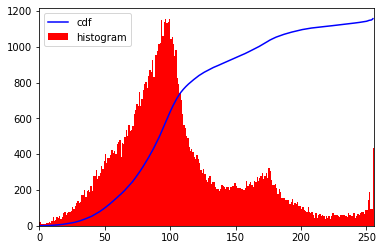

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('imagem_L.jpeg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()


plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
img2 = cdf[img]

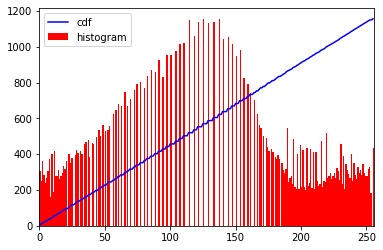

In [ ]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()


plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
img = cv.imread('imagem_L.jpeg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

True

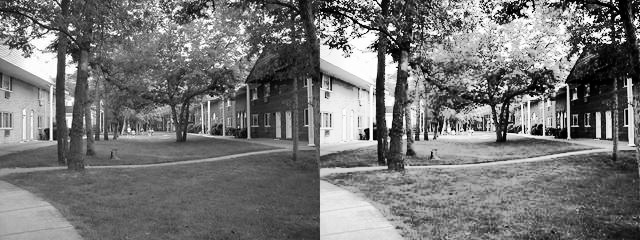

In [ ]:
img = Image.open("res.png")
display.display(img)

6) (15 pontos) Realizar Histogram Matching de pares de imagens em tons de cinza. 

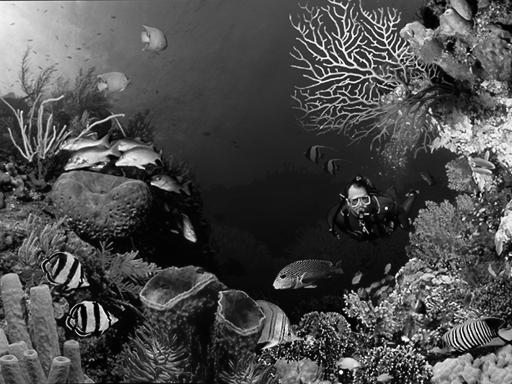

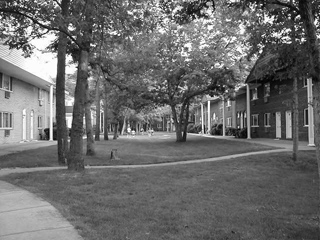

In [ ]:
img = Image.open("Underwater_53k.jpg")
img_L1 = img.convert("L")
img_L1.save('imagem_L1.jpeg')
display.display(img_L1)
display.display(img_L)

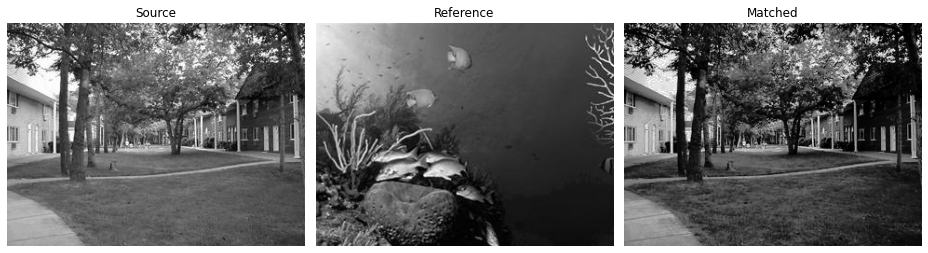

In [ ]:
# import packages
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import cv2

# reading main image
img1 = cv2.imread("imagem_L.jpeg")



# reading reference image
img2 = cv2.imread("imagem_L1.jpeg")



image = img1
reference = img2

matched = match_histograms(image, reference ,
						multichannel=True)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
									figsize=(13, 7),
									sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
	aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

7) (25 pontos) Reduzir uma imagem (zoom out) utilizando fatores de redução sx e sy (sx e sy
 1), onde sx não é necessariamente igual a sy. Para tanto, defina um retângulo com
dimensões sy e sx, e mova-o sobre a imagem, de modo que os retângulos nunca se
sobreponham e que nenhum pixel da imagem deixe de ser coberto. Para cada posição do
retângulo, calcule as médias (R, G e B) dos pixels sob o retângulo, utilizando estes resultados
na imagem de saída. Caso o retângulo vá além das dimensões da imagem original, calcule as
médias usando apenas os pixels sob o retângulo. 

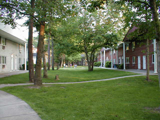

In [ ]:
with Image.open("Gramado_72k.jpg") as im:

    # Provide the target width and height of the image
    (width, height) = (im.width // 2, im.height // 2)
    im_resized = im.resize((width, height))

display.display(im_resized)

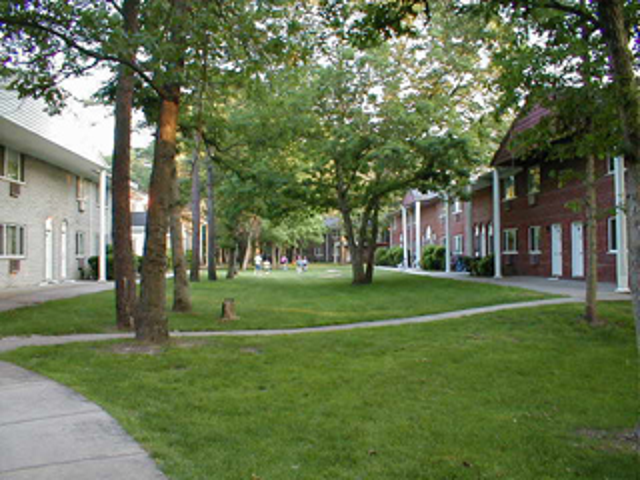

In [ ]:
with Image.open("Gramado_72k.jpg") as im:

    # Provide the target width and height of the image
    (width, height) = (im.width * 2, im.height * 2)
    im_resized = im.resize((width, height))

display.display(im_resized)

9) (15 pontos) Rotacionar imagem de 90o
 (tanto no sentido horário como no sentido antihorário). A operação de rotação deve poder ser aplicada múltiplas vezes de modo a permitir
obter rotações de +/- 180o
, +/- 270o
, etc. 

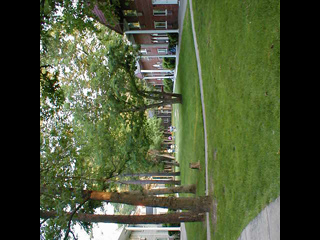

In [ ]:
with Image.open("Gramado_72k.jpg") as im:

    # Rotate the image by 60 degrees counter clockwise
    theta = 90
    # Angle is in degrees counter clockwise
    im_rotated = im.rotate(angle=theta)

display.display(im_rotated)

10) (35 pontos) Implementar um procedimento para realizar convolução entre uma imagem
e um filtro 3x3 arbitrário. De modo a simplificar sua impementação, ignore as bordas da
imagem original e aplique a convolução apenas no seu interior. Exceto para o filtro passa
baixas, aplique a convolução apenas a imagens de luminância. A figura a seguir ilustra a
aplicação de uma operação de convolução ao pixel E utilizando um kernel 3x3. Note que o
kernel é rotacionado de 180o
 antes da aplicação. No exemplo do pixel E, o resultado é:
Conv(E) = iA + hB + gC + fD + eE + dF + cG + bH + aI. Devido à soma de vários produtos e à
A B C
D E F
G H I
A B C
D E F
G H I
…
A B C
D E F
G H I
AB BC
DE EF
GH HI
possibilidade de utilização de pesos negativos, o resultado da convolução pode ser maior que
255 ou menor que zero. Na sua implementação, você deverá aproximar estes casos com os
valores 255 e zero, respectivamente, para os casos (i) a (iii) abaixo. Para os demais, some
127 ao resultado da convolução antes de fazer esta aproximação (clampping). A interface do
seu programa deverá aceitar valores arbitrários para os pesos dos filtros. Teste o seu
procedimento com os kernels (i) a (vii) a seguir. 

In [ ]:
import numpy as np
from scipy import ndimage
import imageio



img = imageio.imread('imagem_L.jpeg')

i) Gaussiano, filtro pass baixas (produz borramento).








[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


Text(0.5, 0, 'Borrada')

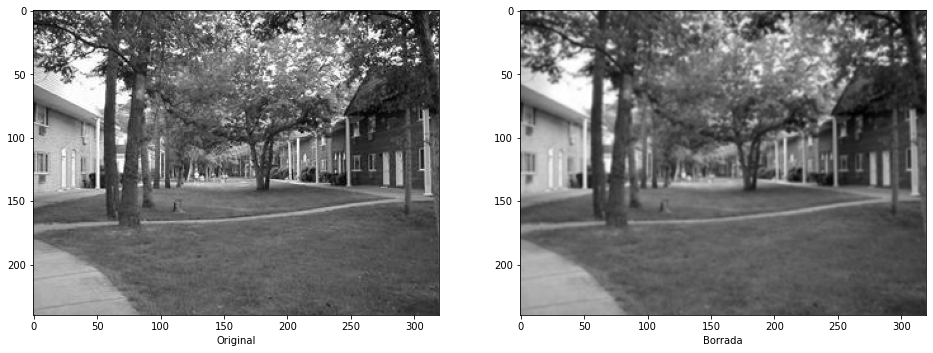

In [ ]:
import numpy as np
from scipy import ndimage
import imageio



img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[0.0625,0.125,0.0625],  
                [0.125,0.25,0.125],
                [0.0625,0.125,0.0625]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Borrada')



ii) Laplaciano, filtro passa altas (detecta arestas importantes).

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


Text(0.5, 0, 'Com Filtro Laplaciano')

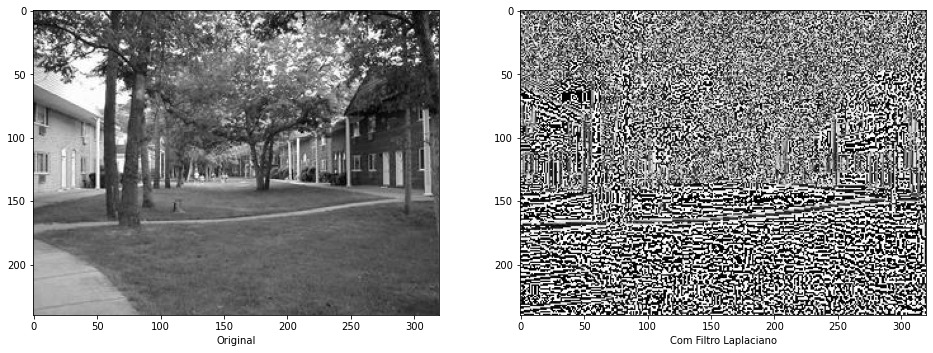

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[0,-1,0],  
                [-1,4,-1],
                [0,-1,0]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com Filtro Laplaciano')

iii) Passa Altas Genérico (detector de arestas mais sensitivo). 

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


Text(0.5, 0, 'Com filtro passa alta')

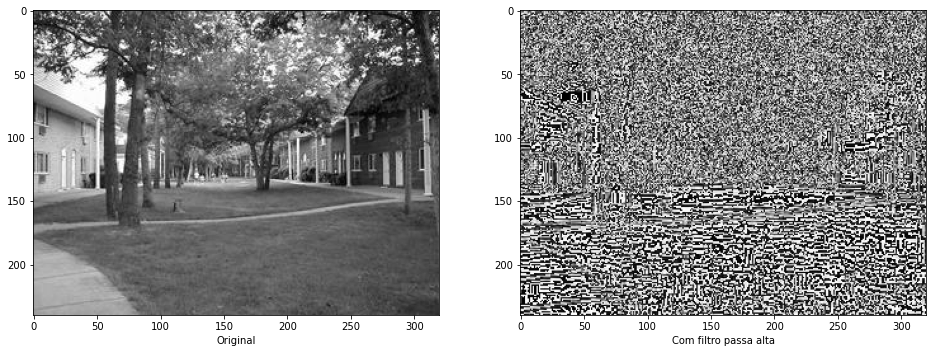

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[-1,-1,-1],  
                [-1,8,-1],
                [-1,-1,-1]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com filtro passa alta')

iv) Prewitt Hx (gradiente dos tons de cinza na direção horizontal – efeito de relevo)

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


Text(0.5, 0, 'Com filtro passa alta')

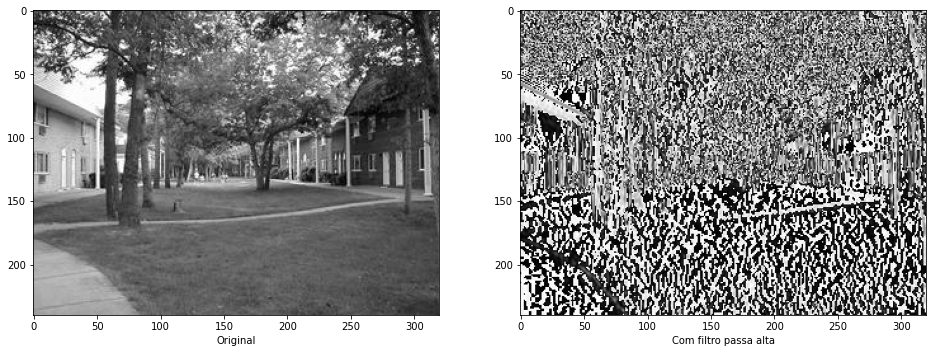

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[-1,0,1],  
                [-1,0,1],
                [-1,0,1]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com filtro Prewitt Hx')

v) Prewitt Hy (gradiente dos tons de cinza na direção vertical – efeito de relevo)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


Text(0.5, 0, 'Com filtro passa alta')

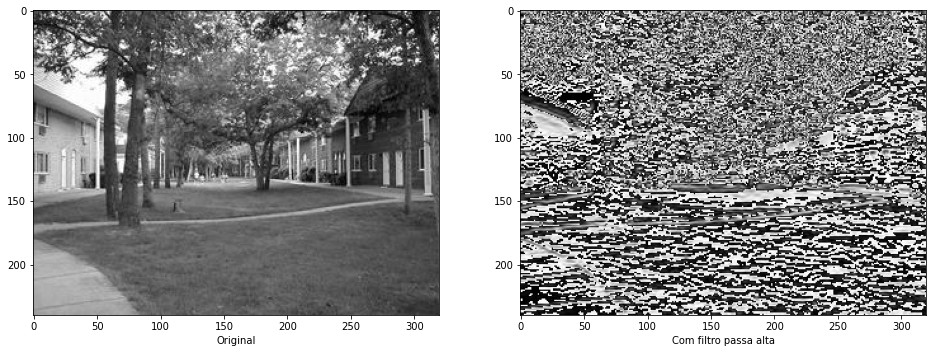

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[-1,-1,-1],  
                [0,0,0],
                [1,1,1]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com filtro prewitt Hy')

vi) Sobel Hx (mais sensível ao gradiente dos tons de cinza na direção horizontal –
efeito de relevo) 

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


Text(0.5, 0, 'Com filtro prewitt Hy')

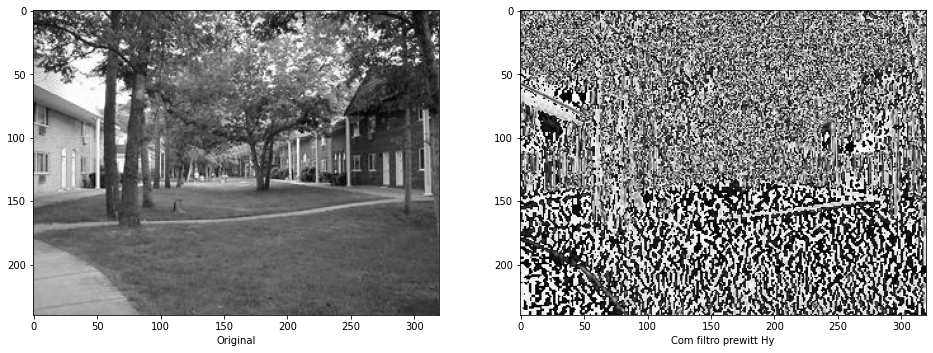

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[-1,0,1],  
                [-2,0,2],
                [-1,0,1]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com filtro Sobel Hx')

vii) Sobel Hy (mais sensível ao gradiente dos tons de cinza na direção vertical – efeito
de relevo) 



[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


Text(0.5, 0, 'Com filtro prewitt Hy')

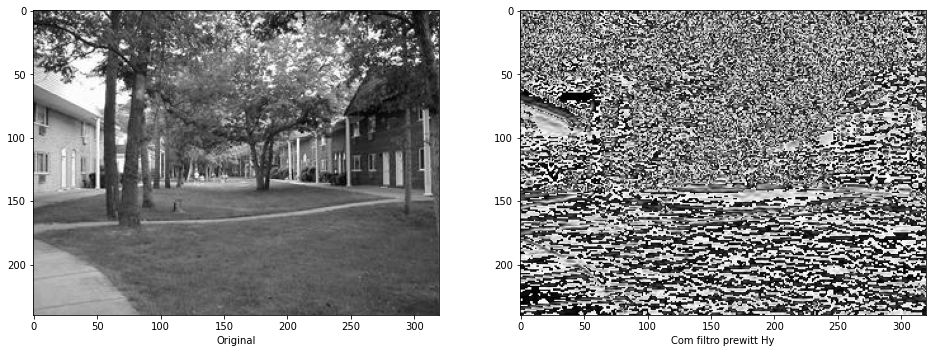

In [ ]:
img = imageio.imread('imagem_L.jpeg')

k = np.asarray([[-1,-2,-1],  
                [0,0,0],
                [1,2,1]])

print(k)

img_blur = ndimage.convolve(img, k)

fig = plt.figure(figsize=(16,16))

fig1 = fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')
fig1.set_xlabel('Original')

fig2 = fig.add_subplot(1,2,2)
plt.imshow(img_blur,cmap='gray')
fig2.set_xlabel('Com filtro Sobel Hy')

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Trabalho 2 - FPI.ipynb')

--2023-01-15 21:41:37--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-01-15 21:41:37 (38.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-opt

'File Download Unsuccessful. Saved in Google Drive'